In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


#### Being an avid follower of the IPL, I decided to answer a few questions that I had on the tournament- 

1. Does winning the toss make a difference to the outcome? Are there certain grounds where this trend is different?
2. Do teams batting second tend to win more? How has this trend changed over the years?
3. Do teams have a higher win % at home?

In [2]:
# Extracting the matches data and seeing the first few rows
matches = pd.read_csv("/kaggle/input/ipl/matches.csv")
print(matches.shape)
matches.head()


(636, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Q1a - Do tosses have an impact on the outcome of a match?

Looking a the plot below, we can see that the toss does not have an effect on the outcome of the game. Around 50% of the matches where the team has won the toss have resulted in a victory. 

<AxesSubplot:title={'center':'Did a team that won the toss also win the match?'}, ylabel='Number of matches'>

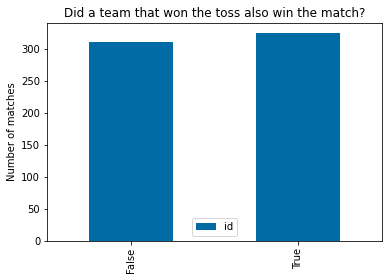

In [3]:
##Creating a new column to identify a team that has won the toss and the match
matches["toss_match_win"] = matches.winner == matches.toss_winner 

#Calculating win % by toss_match_win column and storing in toss_overall
toss_overall = pd.DataFrame(matches.groupby("toss_match_win").count()["id"])
plt.style.use("tableau-colorblind10")
toss_overall.plot.bar(title = "Did a team that won the toss also win the match?", ylabel = "Number of matches", xlabel = "", stacked = True)

#### Q1b - Does this hold true across the different venues?
We can say that the toss does seem to play a role in Durban and Pune where the win % of teams that have won the toss is around 60%. However, in other venues, the toss does not seem to play a role.


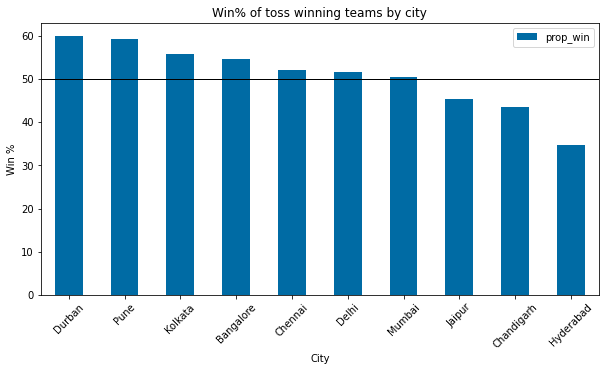

In [4]:
#Is this trend different across cities?
city_summary = matches.groupby(["city"]).agg({"toss_match_win": "sum", "id": "count"}).reset_index()

## Calculating win %
city_summary["prop_win"] = city_summary["toss_match_win"]/city_summary["id"] * 100

#Plotting toss winning win% across cities
city_summary[city_summary["id"] >= 14].sort_values("prop_win", ascending = False)\
.plot.bar(x = "city", y = "prop_win", title = "Win% of toss winning teams by city", 
          ylabel = "Win %", xlabel = "City", figsize = (10,5), rot = 45)
plt.axhline(y=50,linewidth=1, color='k')


#### Q2 - Do teams batting second win more games? How do these trends vary across cities and seasons?

1. Cities - Jaipur(70%), Kolkata(62%) and Hyderabad(61%) are the only cities where the team batting second seem to have an advantage. In most cities, batting second does not seem to affect the outcome. In Chennai however, team's batting second are at a disadvantage, winning only **35%** of games.

2. Seasons - There does not seem to be any significant trend across seasons when it comes to teams batting second.


<AxesSubplot:title={'center':'Win% of teams that bat second by season'}, xlabel='season', ylabel='Win %'>

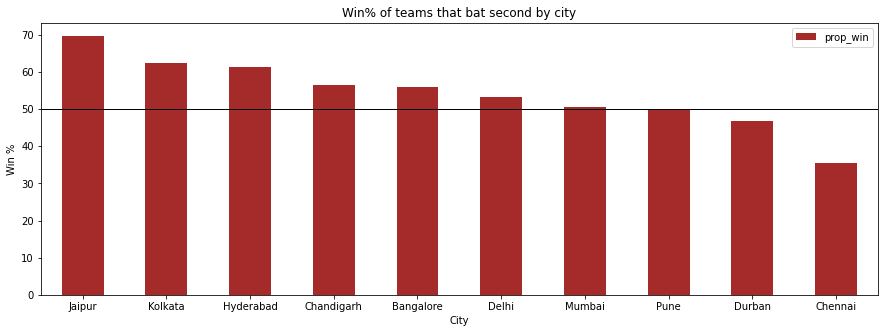

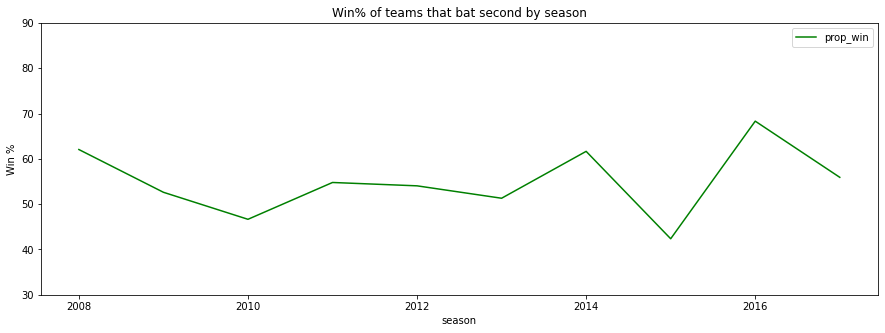

In [5]:
### Creating column that shows the 1st innings fielding team
matches["toss_loser"] = np.where(matches["toss_winner"] == matches["team2"], matches["team1"], matches["team2"])

matches["f_field"] = np.where(matches["toss_decision"] == "field", matches["toss_winner"], matches["toss_loser"])
matches["f_field_win"] = matches["f_field"] == matches["winner"]
matches.head()

### Grouping by city
bat_second = matches.groupby(["city"]).agg({"f_field_win": "sum", "id": "count"}).reset_index()
bat_second["prop_win"] = bat_second["f_field_win"]/bat_second["id"] * 100

## Plotting bar chart across cities
bat_second[bat_second["id"] >= 14].sort_values("prop_win", ascending = False)\
.plot.bar(x = "city", y = "prop_win", title = "Win% of teams that bat second by city", 
          ylabel = "Win %", xlabel = "City", figsize = (15,5),rot = 0 ,color = "brown")
plt.axhline(50, linewidth = 1, color = 'k')

### Grouping by season
bat_second_season = matches.groupby(["season"]).agg({"f_field_win": "sum", "id": "count"}).reset_index()
bat_second_season["prop_win"] = bat_second_season["f_field_win"]/bat_second_season["id"]*100

### Plotting line chart across seasons
bat_second_season.plot(x = "season", y = "prop_win", title = "Win% of teams that bat second by season", 
          ylabel = "Win %", xlabel = "season", color = "g", ylim = (30,90), figsize = (15,5))


#### Q3 - When teams play at home, do they win more? 

Each team plays at home for 50% of the games in most seasons. Therefore, a strong performance at home is vital to have success in this tournament.

From the graph below, we can see that out of the 10 venues (10 teams), 5 teams have a good home record, i.e. at least 50% or more win record at home. Another interesting fact about these teams is that all these teams have won the tournament at least once. The other 5. whose win rate at home is <50% have never won the tournament. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


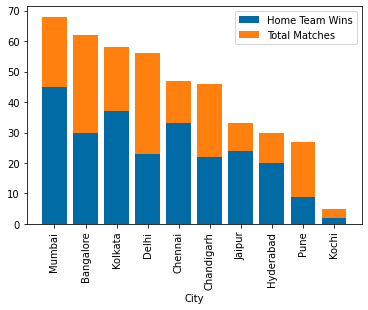

In [6]:
#Creating two columns to check if team1 and team2 are home teams
matches["home_team1"] = [x[0] if x[1] in x[0] else "NA" for x in zip(matches["team1"].astype("str"),matches['city'].astype("str")) ]
matches["home_team2"] = [x[0] if x[1] in x[0] else "NA" for x in zip(matches["team2"].astype("str"),matches['city'].astype("str")) ]

#Creating the final home team column
matches["home_team"] = np.where(matches["home_team1"] != "NA", matches["home_team1"], np.where(matches["home_team2"] != "NA", matches["home_team2"], "Neutral"))
matches["home_team"] = np.where(matches["city"] == "Jaipur", "Rajasthan Royals", matches["home_team"])
matches["home_team"] = np.where(matches["city"] == "Chandigarh", "Kings XI Punjab", matches["home_team"])

#Calculating home wins
matches["home_win"] = matches["home_team"] == matches["winner"]

#Neutral grounds need to be excluded
home_summary = matches[matches["home_team"] != "Neutral"].groupby("city").agg({"home_win":"sum","id":"count"})

# Sorting by total number of matches (id)
home_summary = home_summary.sort_values("id", ascending = False)

#Plotting the results
fig, ax = plt.subplots()

ax.bar(home_summary.index, home_summary["home_win"], label = "Home Team Wins")
ax.bar(home_summary.index, home_summary["id"] - home_summary["home_win"], bottom = home_summary["home_win"], label = "Total Matches")
ax.set_xlabel(xlabel = "City")
ax.set_xticklabels(home_summary.index, rotation=90)
ax.legend()
plt.show()